#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [2]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [6]:
base=2.0
nextExp=53
currentExp=52
spacing=base**(currentExp+1-nextExp)
print("lo spacing è ",spacing)
x=base**currentExp+spacing
print("il prossimo numero è ",x)
z=base**currentExp+0.5
print("z = ",z)
q=base**currentExp+spacing+0.5
print("q = ",q)

lo spacing è  1.0
il prossimo numero è  4503599627370497.0
z =  4503599627370496.0
q =  4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [7]:
min=-1022
max=1023
base= 2.0
t=53
print("la cardinalità è => ",base*(base-1)*base**(t-1)*(max-min+1)+1)

la cardinalità è =>  1.842872967520007e+19


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [13]:
min=0
max=1
base= 2.0
spacing=base**(min+1-t)
print("lo spacing è in [1,2] ",spacing)
f=base**min
nextNumber=f+spacing
print("il prossimo numero è ",nextNumber)
print("f+s/2 => ",f+spacing/2)

lo spacing è in [1,2]  2.220446049250313e-16
il prossimo numero è  1.0000000000000002
f+s/2 =>  1.0


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [16]:
import numpy 
arr=numpy.full(10,0.1)
sum=0.0
for i in range(arr.size):
    sum+=arr[i]
print("somma for ",sum)
print("somma numpy ",numpy.sum(arr))

somma for  0.9999999999999999
somma numpy  1.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [19]:
a = 1.234567890123400e+15
b = -1.234567890123401e+15
c = 0.06
print("(a+b)+c = ",(a+b)+c)
print("a+(b+c) = ",a+(b+c))
print("(a+c)+b = ",(a+c)+b)
print("spacing di c ",numpy.spacing(c))

(a+b)+c =  -0.94
a+(b+c) =  -1.0
(a+c)+b =  -1.0
spacing di a  6.938893903907228e-18


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [22]:
import math as Math
x1=7777
x2=77777777
def y1(x):
    return Math.sqrt(x**2+1)-x
def y2(x):
    return 1/(Math.sqrt(x**2+1)+x)

print("y1(x1) = ",y1(x1))
print("y2(x1) = ",y2(x1))
print("y1(x2) = ",y1(x2))
print("y2(x2) = ",y2(x2))


y1(x1) =  6.429214317904552e-05
y2(x1) =  6.429214323431402e-05
y1(x2) =  0.0
y2(x2) =  6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

In [31]:
import numpy 

x=numpy.array([10**i for i in range(0,20)])
print("x = ",x)
print("-------------------")
A = lambda x: 1/x - 1/(x+1)
B = lambda x: 1/(x*(x+1))

for i in range(x.size):
    print("x = ",x[i])
    print("A(x) = ",A(x[i]))
    print("B(x) = ",B(x[i]))
    print("errore relativo = ",numpy.abs(A(x[i])-B(x[i])/numpy.abs(B(x[i]))))
    print("-------------------")



x =  [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19]
-------------------
x =  1.0
A(x) =  0.5
B(x) =  0.5
errore relativo =  0.5
-------------------
x =  10.0
A(x) =  0.009090909090909094
B(x) =  0.00909090909090909
errore relativo =  0.990909090909091
-------------------
x =  100.0
A(x) =  9.90099009900991e-05
B(x) =  9.900990099009902e-05
errore relativo =  0.9999009900990099
-------------------
x =  1000.0
A(x) =  9.990009990010207e-07
B(x) =  9.99000999000999e-07
errore relativo =  0.999999000999001
-------------------
x =  10000.0
A(x) =  9.999000099989363e-09
B(x) =  9.999000099990002e-09
errore relativo =  0.9999999900009999
-------------------
x =  100000.0
A(x) =  9.99990000100624e-11
B(x) =  9.99990000099999e-11
errore relativo =  0.999999999900001
-------------------
x =  1000000.0
A(x) =  9.999989998934512e-13
B(x) =  9.99999000001e-13
errore relativo =  0.999999999999
-----------

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

In [36]:
import numpy as np
delta=lambda a,b,c: b**2-4*a*c
x1=lambda a,b,c: (-b+numpy.sqrt(delta(a,b,c)))/(2*a)
x2=lambda a,b,c: (-b-numpy.sqrt(delta(a,b,c)))/(2*a)
a=1
k=np.arange(0,20)
b=[10**k[i] for i in range(k.__len__())]
c=1
for i in range(b.__len__()):
    print("delta = ",delta(a,b[i],c))
    print("x1 = ",x1(a,b[i],c))
    print("x2 = ",x2(a,b[i],c))
    print("errore relativo = ",numpy.abs(delta(a,b[i],c)-b[i]**2)/numpy.abs(b[i]**2))
    print("-------------------")

delta =  96
x1 =  -0.10102051443364424
x2 =  -9.898979485566356
errore relativo =  0.04
-------------------
delta =  9996
x1 =  -0.010001000200048793
x2 =  -99.98999899979995
errore relativo =  0.0004
-------------------
delta =  999996
x1 =  -0.0010000010000226212
x2 =  -999.998999999
errore relativo =  4e-06
-------------------
delta =  99999996
x1 =  -0.00010000000111176632
x2 =  -9999.999899999999
errore relativo =  4e-08
-------------------
delta =  9999999996
x1 =  -1.0000003385357559e-05
x2 =  -99999.99999
errore relativo =  4e-10
-------------------
delta =  999999999996
x1 =  -1.00000761449337e-06
x2 =  -999999.999999
errore relativo =  4e-12
-------------------
delta =  99999999999996
x1 =  -9.96515154838562e-08
x2 =  -9999999.9999999
errore relativo =  4e-14
-------------------
delta =  9999999999999996
x1 =  -7.450580596923828e-09
x2 =  -100000000.0
errore relativo =  4e-16
-------------------


- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

fn =  [2.         2.59374246 2.70481383 2.71692393 2.71814593 2.71826824
 2.71828047 2.71828169 2.7182818  2.71828205 2.71828205 2.71828205
 2.7185235  2.71611003 2.71611003 3.03503521 1.        ]
spacing =  4.440892098500626e-16


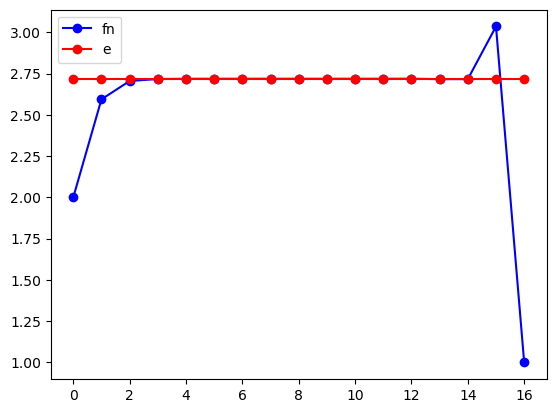

In [45]:
import numpy as np
import matplotlib.pyplot as plt
k=np.arange(0,17)
n=10**k
fn=(1/n+1)**n
print("fn = ",fn)
value = np.exp(1)

spacing = np.spacing(value)
print("spacing = ",spacing)

plt.plot(fn, label='fn',marker='o',color='blue')
plt.plot(value*np.ones((17,1)), label='e',marker='o',color='red')
plt.legend()
plt.show()